# Project M19 Covid death prediction

Objective - To develop a ML model for predicting deaths due to covid infection based on infection data

Approach - Target variable (Deaths) is a continous variable hence, building regression model will be best approach

# Importing Libraries

In [2]:
# Importing all required libs by using pyforest

# Importing datasets

In [3]:
cov = pd.read_csv('aggregate_covid_country.csv')

<IPython.core.display.Javascript object>

# Performing Exploratory Data Analysis

In [4]:
cov = cov[cov.Deaths !=0]

In [5]:
cov

,Date,Country,Confirmed,Recovered,Deaths
36,2020-01-22,China,548,28,17
224,2020-01-23,China,643,30,18
412,2020-01-24,China,920,36,26
600,2020-01-25,China,1406,39,42
788,2020-01-26,China,2075,49,56
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [6]:
cov.shape

(10699, 5)

In [7]:
cov.describe()

,Confirmed,Recovered,Deaths
count,1.069900e+04,10699.000000,10699.000000
mean,1.762498e+04,5711.690625,1166.654547
std,8.594713e+04,22132.952563,5878.171071
min,1.000000e+00,0.000000,1.000000
25%,2.080000e+02,20.000000,4.000000
50%,9.520000e+02,183.000000,20.000000
75%,6.195500e+03,1366.000000,146.000000
max,1.680913e+06,384902.000000,98913.000000


In [8]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10699 entries, 36 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       10699 non-null  object
 1   Country    10699 non-null  object
 2   Confirmed  10699 non-null  int64 
 3   Recovered  10699 non-null  int64 
 4   Deaths     10699 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 501.5+ KB


In [9]:
cov.nunique()

Date          126
Country       168
Confirmed    5304
Recovered    3303
Deaths       1767
dtype: int64

In [10]:
cov.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

10699
2020-05-26    168
2020-05-25    167
2020-05-24    166
2020-05-23    166
2020-05-20    165
             ... 
2020-01-29      1
2020-01-30      1
2020-01-24      1
2020-01-26      1
2020-01-22      1
Name: Date, Length: 126, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

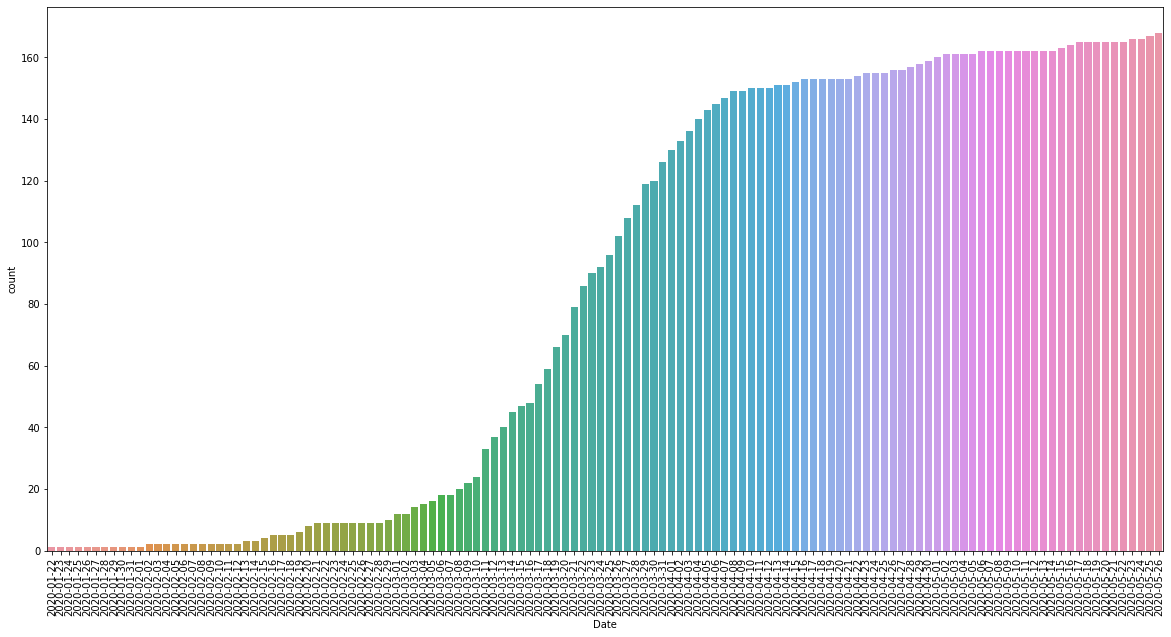

In [11]:
print(cov.Date.count())
print(cov.Date.value_counts())
plt.figure(figsize=(20,10))
sns.countplot(cov.Date)
plt.xticks(rotation=90)
plt.show()

10699
China                       126
Philippines                 115
Japan                       104
France                      102
Taiwan*                     101
                           ... 
Nepal                        11
Madagascar                   10
Central African Republic      4
Mozambique                    2
Western Sahara                1
Name: Country, Length: 168, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

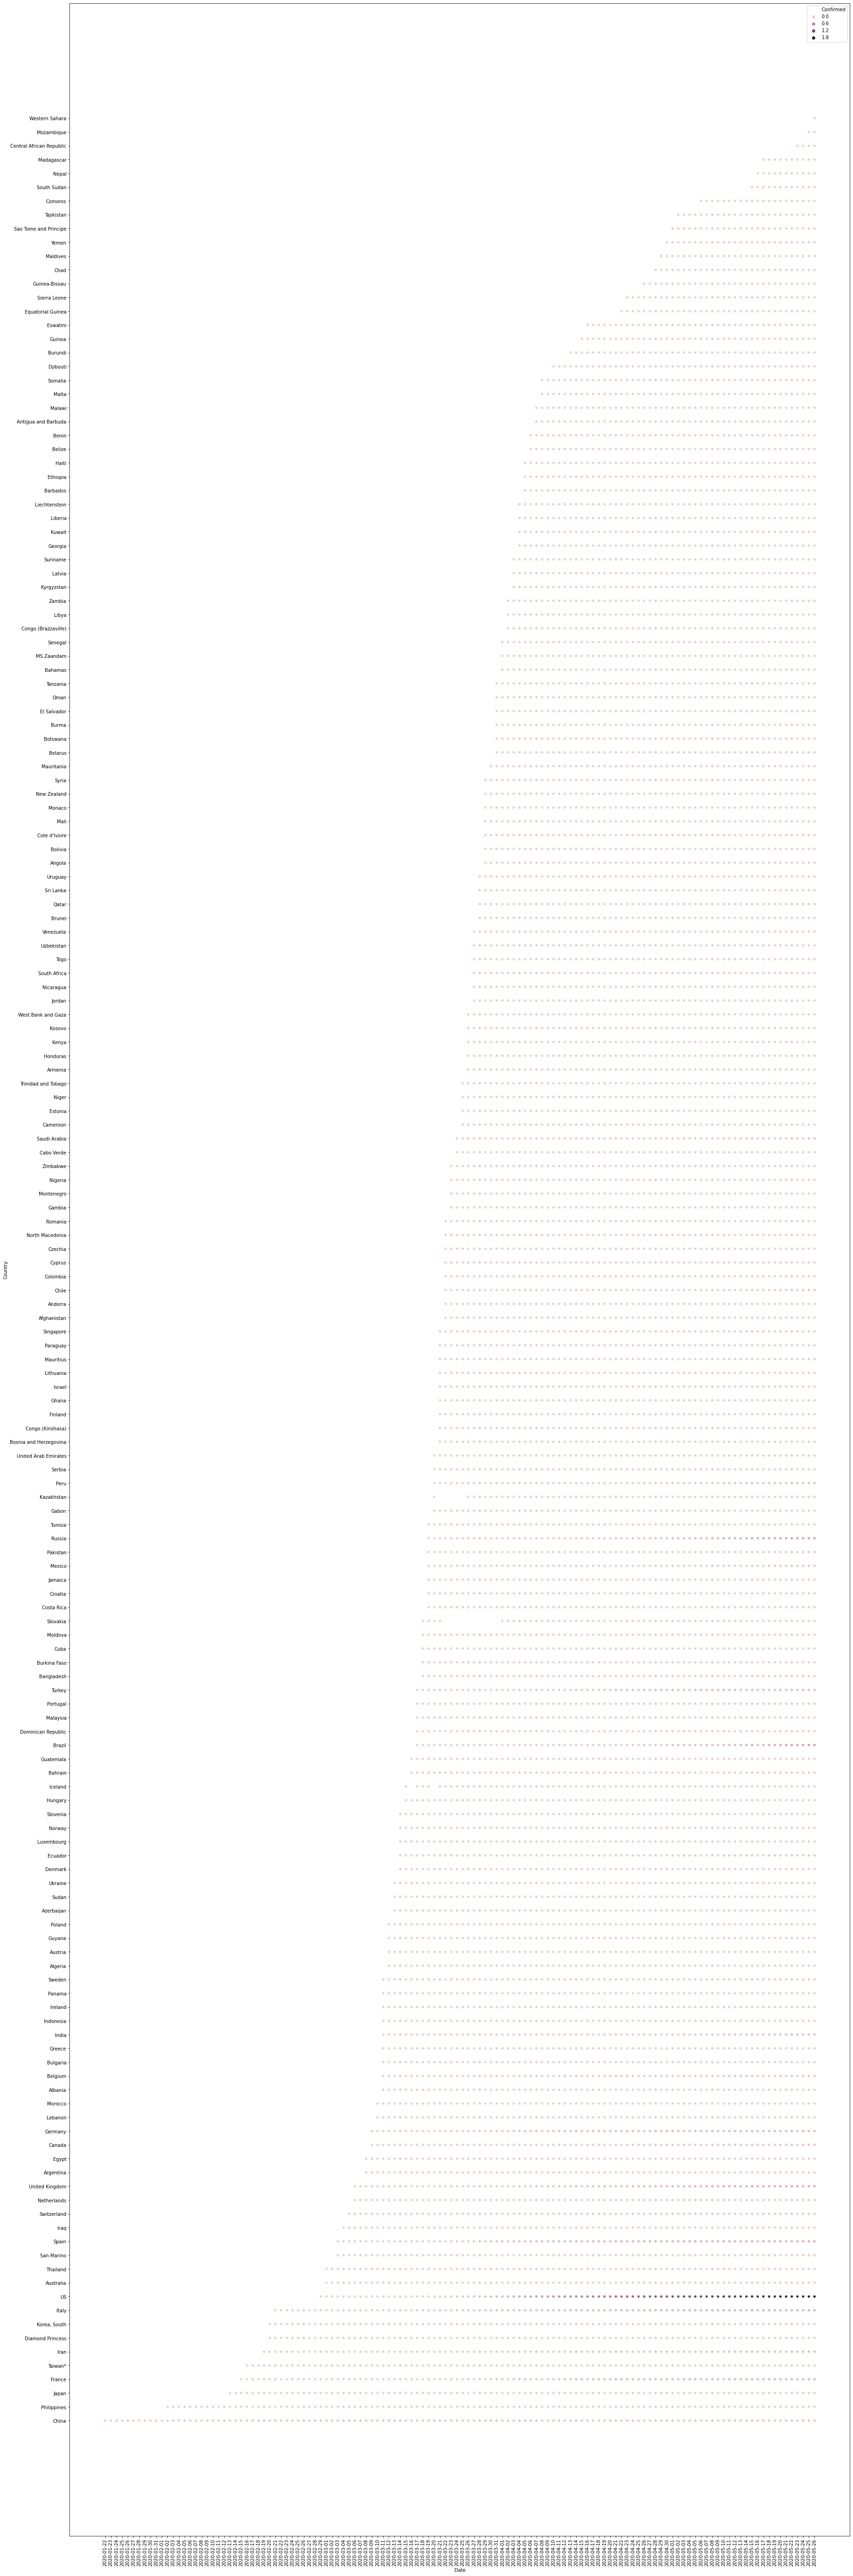

In [12]:
print(cov.Country.count())
print(cov.Country.value_counts())
plt.figure(figsize=(30,100))
sns.scatterplot(cov.Date, cov.Country, hue = cov.Confirmed, cmap = 'viridis')
plt.xticks(rotation=90)
plt.show()

10699
1        1244
2         655
3         550
4         324
6         321
         ... 
3309        1
1284        1
3333        1
5398        1
28678       1
Name: Deaths, Length: 1767, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

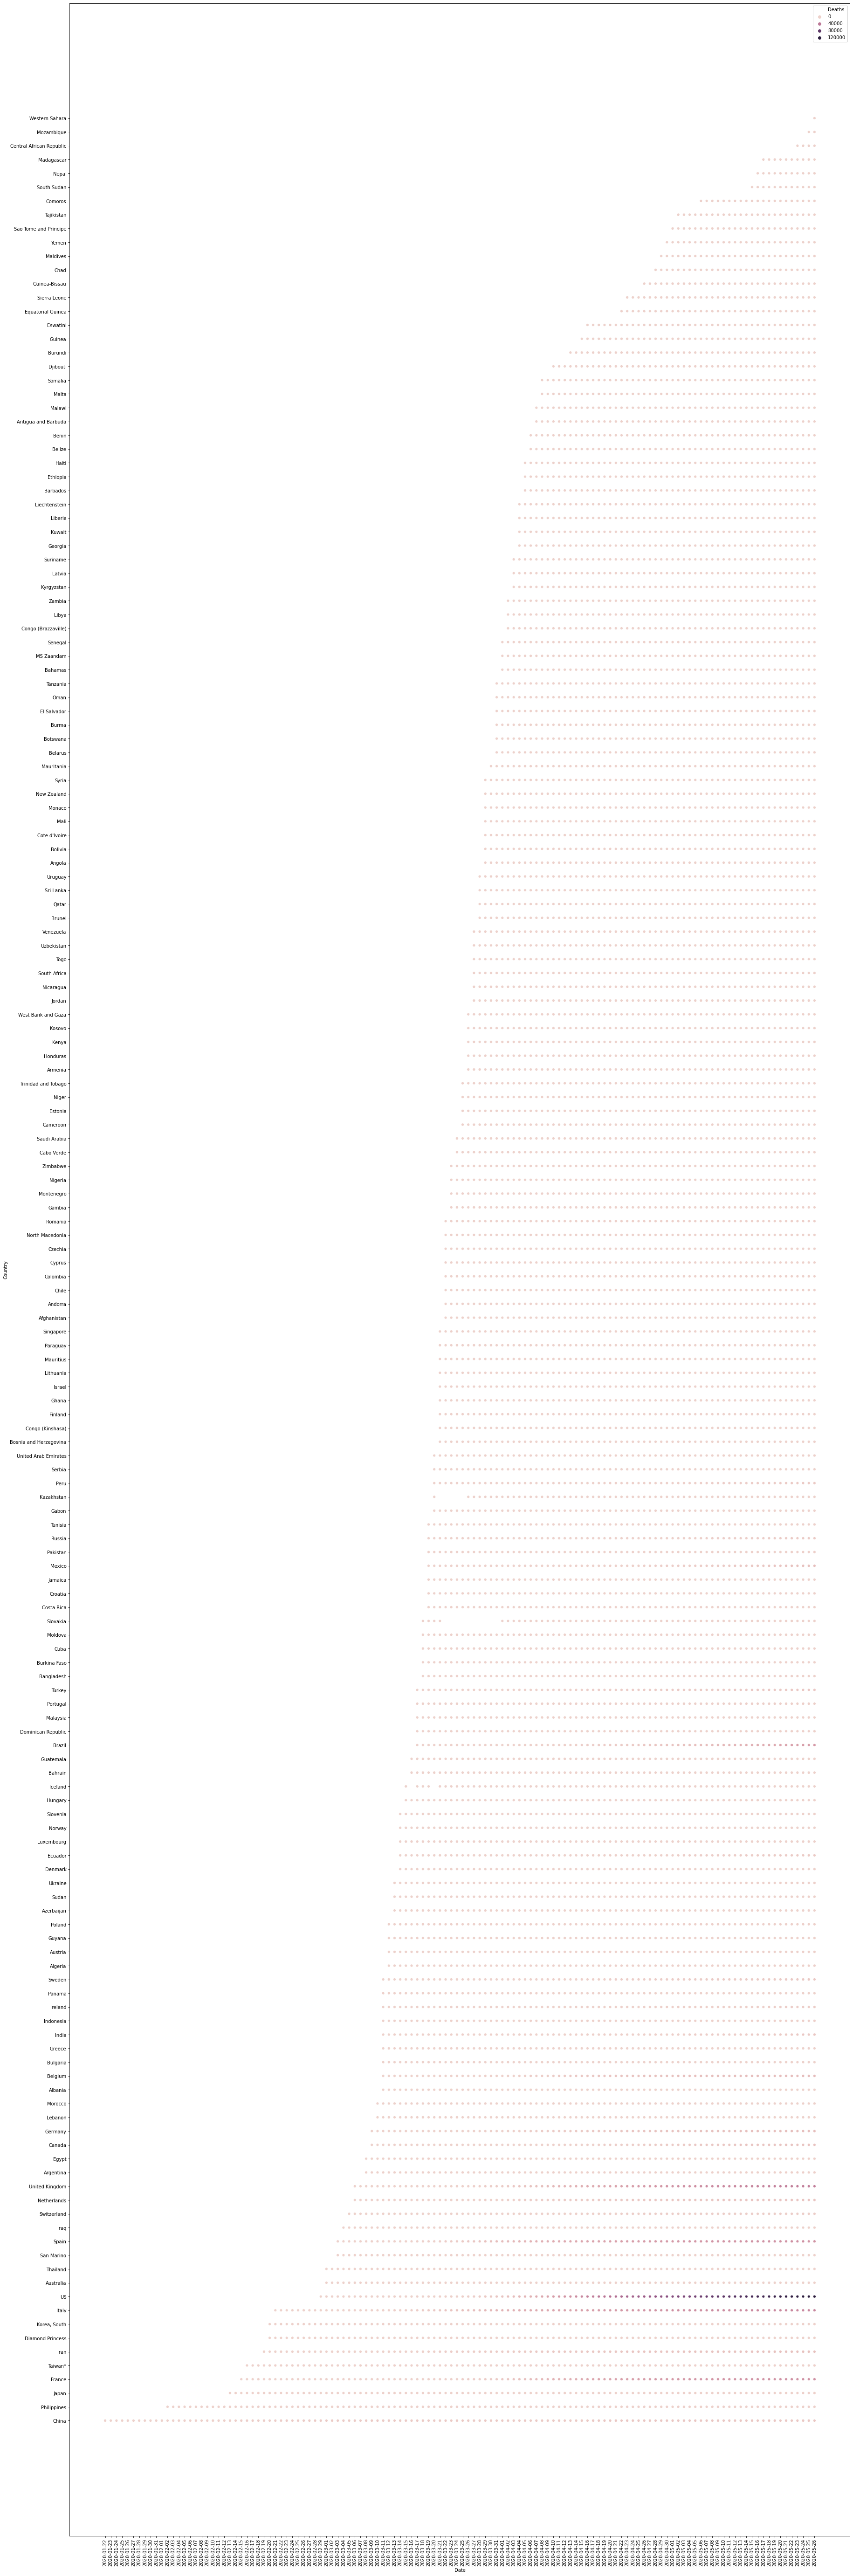

In [13]:
print(cov.Deaths.count())
print(cov.Deaths.value_counts())
plt.figure(figsize=(30,100))
sns.scatterplot(cov.Date, cov.Country, hue = cov.Deaths, cmap = 'viridis')
plt.xticks(rotation=90)
plt.show()

Confirmed       AxesSubplot(0.125,0.71587;0.227941x0.16413)
Recovered    AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Deaths       AxesSubplot(0.672059,0.71587;0.227941x0.16413)
dtype: object

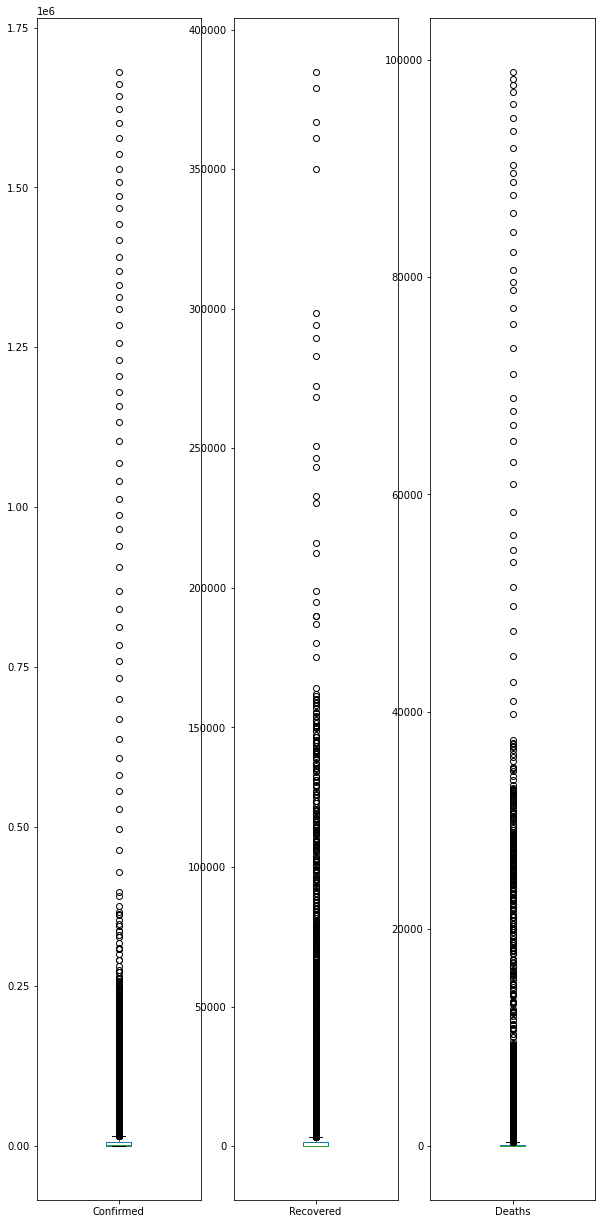

In [14]:
cov.plot(kind= 'box', subplots = True , layout = (4,3), figsize = (10,100))

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cov['Country'] = le.fit_transform(cov['Country'])
cov['Date'] = le.fit_transform(cov['Date'])

<IPython.core.display.Javascript object>

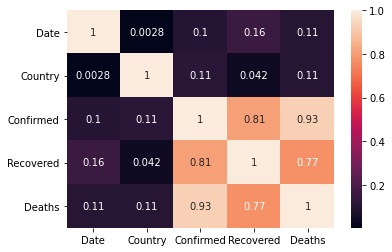

In [16]:
cov_cor = cov.corr()
sns.heatmap(cov_cor, annot =True)

In [17]:
cov.head()

,Date,Country,Confirmed,Recovered,Deaths
36,0,34,548,28,17
224,1,34,643,30,18
412,2,34,920,36,26
600,3,34,1406,39,42
788,4,34,2075,49,56


In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [19]:
x = cov.drop(['Deaths'], axis =1)
y = pd.DataFrame(cov['Deaths'])

<IPython.core.display.Javascript object>

In [20]:
# Identifying best random state
best_random_state = 0
accu = 0
for i in range(30,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.22,random_state = i)
    lnr = LinearRegression()
    lnr.fit(x_train,y_train)
    lnrpred = lnr.predict(x_test)
    lnracc = r2_score(y_test,lnrpred)
    if lnracc> accu:
        accu = lnracc
        best_random_state = i
        
        

print(f'For best random state {best_random_state} r2_score is {accu *100}')
    

For best random state 40 r2_score is 90.47988332236882


In [21]:
# Checking best model with identified random state
import warnings
warnings.filterwarnings('ignore')
list=[LinearRegression(),Lasso(alpha = 0.0001),Ridge(alpha = 0.0001), 
      ElasticNet(alpha = 0.0001), RandomForestRegressor(),AdaBoostRegressor(), DecisionTreeRegressor(), xgboost.XGBRegressor()]
for m in list:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.22, random_state = 40)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cv_score = cross_val_score(m,x,y,cv= 10).mean()
    print(f'For algorithm {m} R2 Score is {r2_score(y_test,pred)*100}')
    print(f'For algorithm {m} mean Sqr Error is {mean_squared_error(y_test,pred)*100}')
    print(f'For algorithm {m} mean abs. error is {mean_absolute_error(y_test,pred)*100}')
    print(f'For algorithm {m} cross validation score is {cv_score*100}')
    print(f'Difference between r2 score & cv score = {(r2_score(y_test,pred)*100)-(cv_score*100)}\n')

For algorithm LinearRegression() R2 Score is 90.47988332236882
For algorithm LinearRegression() mean Sqr Error is 419719669.26992965
For algorithm LinearRegression() mean abs. error is 59433.55278630384
For algorithm LinearRegression() cross validation score is 75.5713930254591
Difference between r2 score & cv score = 14.908490296909719

For algorithm Lasso(alpha=0.0001) R2 Score is 90.47988332312613
For algorithm Lasso(alpha=0.0001) mean Sqr Error is 419719669.2365421
For algorithm Lasso(alpha=0.0001) mean abs. error is 59433.552536167794
For algorithm Lasso(alpha=0.0001) cross validation score is 75.57139288254196
Difference between r2 score & cv score = 14.908490440584174

For algorithm Ridge(alpha=0.0001) R2 Score is 90.47988332236908
For algorithm Ridge(alpha=0.0001) mean Sqr Error is 419719669.26991874
For algorithm Ridge(alpha=0.0001) mean abs. error is 59433.55278623799
For algorithm Ridge(alpha=0.0001) cross validation score is 75.57139302545293
Difference between r2 score & c

In [22]:
# Building model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.22, random_state = 40)
xgb_r = xgboost.XGBRegressor()
xgb_r.fit(x_train,y_train)
pred = xgb_r.predict(x_test)
print(xgb_r.score(x_train,y_train))
print(xgb_r.score(x_test,y_test))

0.9999452277005523
0.9959790445204724


# Saving the model

In [23]:
import joblib
joblib.dump(xgb_r,'Covid.pkl')

['Covid.pkl']

In [24]:
joblib.load('Covid.pkl')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
pred = xgb_r.predict(x)

In [30]:
i = pred.reshape(-1,1)

In [31]:
y.shape

(10699, 1)

In [32]:
i.shape

(10699, 1)

<IPython.core.display.Javascript object>

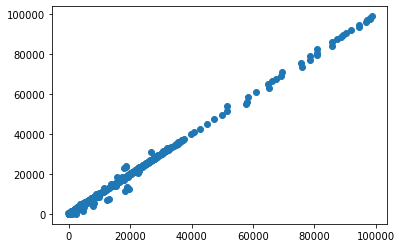

In [40]:
plt.scatter(pred,y)